<a href="https://colab.research.google.com/github/vilaparthibhaskar/IT7103/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

stroke = pd.read_csv('/content/drive/MyDrive/PDA/stroke.csv')
stroke.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
from sklearn.model_selection import train_test_split

traindata, testdata = train_test_split(stroke, test_size = 0.25) #testsize = 0.25 means that 25% of data will be for testing, 75% for training
traindata.shape, testdata.shape

((3832, 12), (1278, 12))

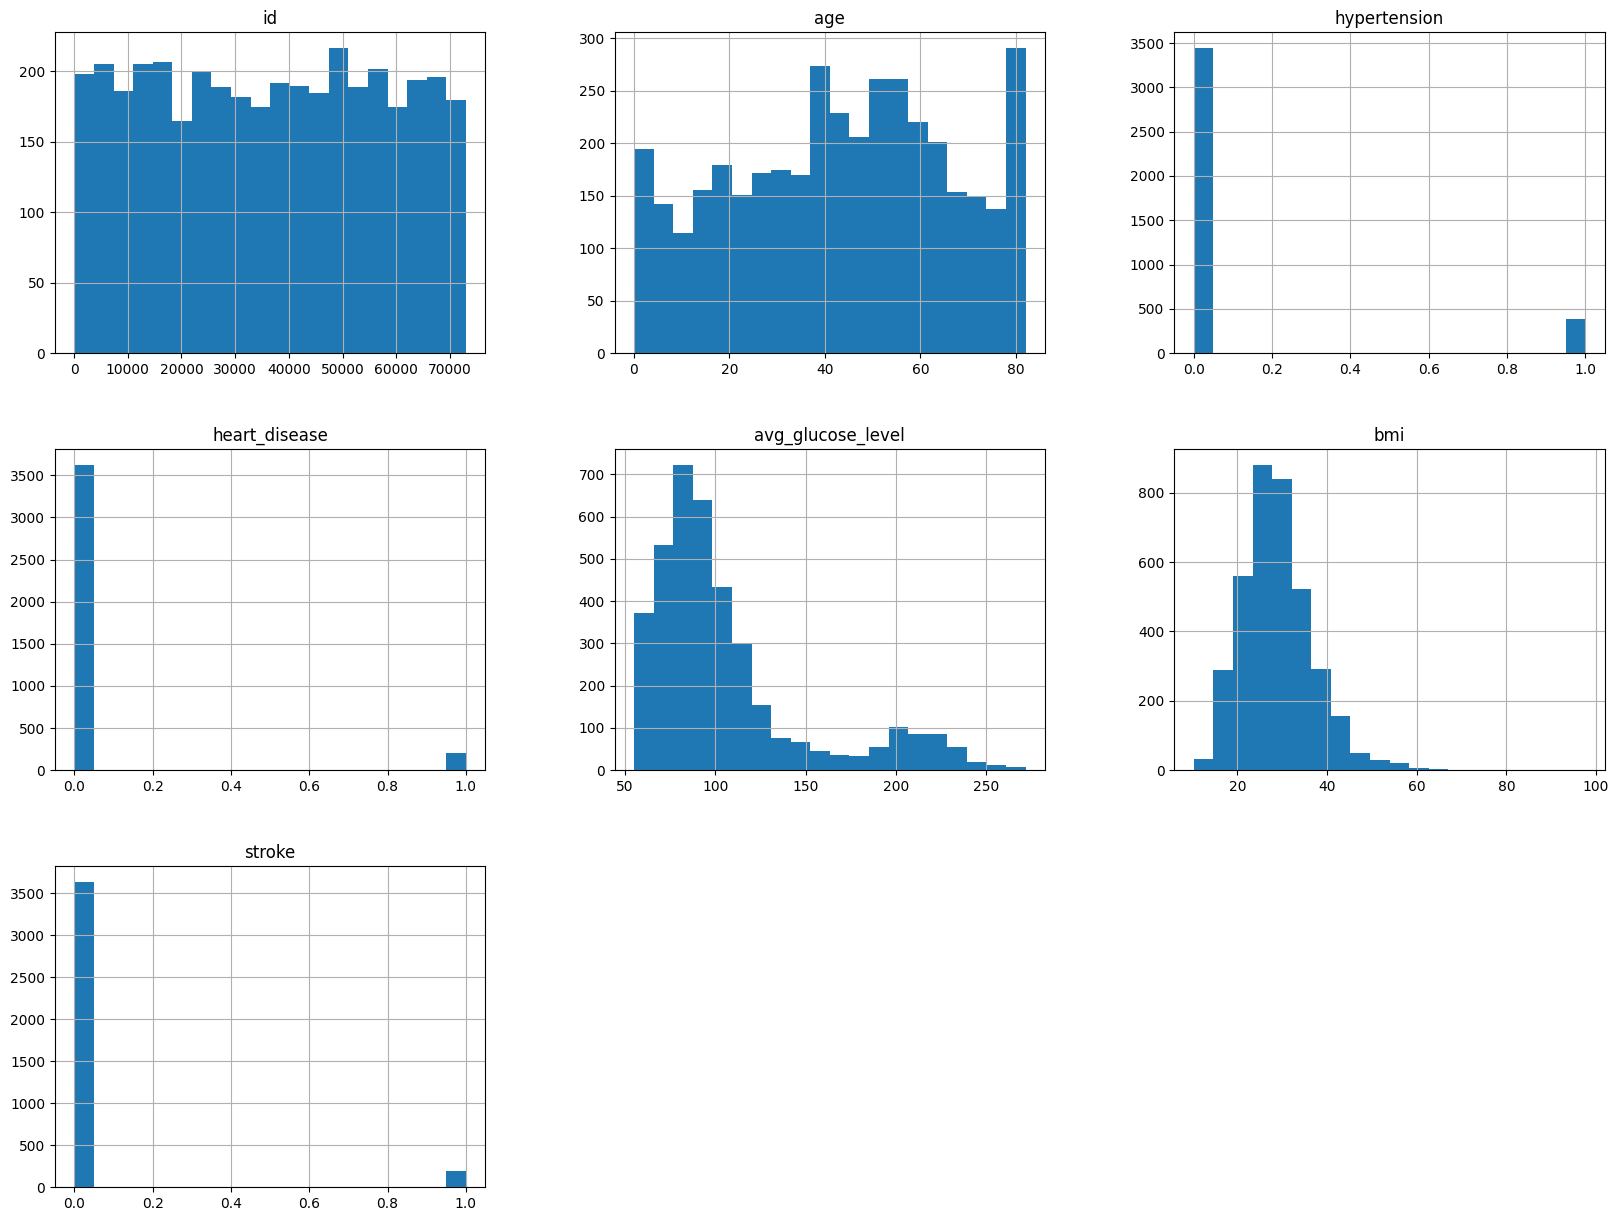

In [6]:
from matplotlib import pyplot as plt

traindata.hist(bins=20, figsize=(20,15))
plt.show()

In [7]:
num_sym, num_skew, cat_cols = ['age'], ['avg_glucose_level', 'bmi'], ['hypertension', 'heart_disease', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
target = 'stroke'

In [8]:
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

num_pipeline = Pipeline([                           #now we need a small pipeline for numeric columns)
    ('standardize', StandardScaler())               #this step will scale all numeric columns
])

def log_transformation(x):
    return np.log(x+0.1)

log_pipeline = Pipeline([                                        #now we need a small pipeline for numeric columns since it has two steps
    ('impute', SimpleImputer(strategy='median')),                #this step will impute missing values using column medians
    ('log transform', FunctionTransformer(log_transformation)), #this include a log transformation into the pipeline
    ('standardize', StandardScaler())                            #this step will scale all numeric columns
])

processing_pipeline = ColumnTransformer([                                                      #this transformer merges the processed numeric columns and class columns
    ('numeric', num_pipeline, num_sym),                                                       #numeric columns
    ('log', log_pipeline, num_skew),                                                           #log columns
    ('class', OneHotEncoder(max_categories=6, handle_unknown='infrequent_if_exist', drop='if_binary'), cat_cols) #encoder to transform class columns to numeric, this will automatically handle missing data
  ])

In [9]:
processing_pipeline

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('standardize',
                                                  StandardScaler())]),
                                 ['age']),
                                ('log',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('log transform',
                                                  FunctionTransformer(func=<function log_transformation at 0x7fd4237377f0>)),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 ['avg_glucose_level', 'bmi']),
                                ('class',
                                 OneHotEncoder(drop='if_binary',
                                               handle_unknown='infrequent_if_exist',
                                               max_categories=6),
                                 ['hypertension', 'heart_disease', 'gender',
                                  'ever_married', 'work_type', 'Residence_type',
                                  'smoking_status'])])

In [10]:
processing_pipeline.fit(traindata)  # training the pipeline on training data

train_processed = processing_pipeline.transform(traindata) #transformating the traindata
test_processed = processing_pipeline.transform(testdata)   #transformating the testdata

print(train_processed.shape)
print(test_processed.shape)

(3832, 19)
(1278, 19)


logisticRegression without Tuning

In [11]:
from sklearn.linear_model import LogisticRegression

logistic_pipeline = Pipeline([
    ('processing',processing_pipeline),
    ('modeling',LogisticRegression())
])

logistic_pipeline.fit(traindata, traindata[target])

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardize',
                                                                   StandardScaler())]),
                                                  ['age']),
                                                 ('log',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log '
                                                                   'transform',
                                                                   FunctionTransformer(func=<function log_transformation at 0x7fd4237377f0>)),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['avg_glucose_level', 'bmi']),
                                                 ('class',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='infrequent_if_exist',
                                                                max_categories=6),
                                                  ['hypertension',
                                                   'heart_disease', 'gender',
                                                   'ever_married', 'work_type',
                                                   'Residence_type',
                                                   'smoking_status'])])),
                ('modeling', LogisticRegression())])

In [12]:
logistic_pred = logistic_pipeline.predict(traindata)
logistic_pred_test = logistic_pipeline.predict(testdata)

from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix
print('train data accuracy score = ', accuracy_score(traindata[target], logistic_pred))
print('test data accuracy score = ', accuracy_score(testdata[target], logistic_pred_test))
print("train data scores are")
print('precision_score = ', precision_score(traindata[target], logistic_pred))
print('recall_score = ', recall_score(traindata[target], logistic_pred))
print('f1_score = ', f1_score(traindata[target], logistic_pred))
print('confused matrix \n' , confusion_matrix(traindata[target], logistic_pred))

train data accuracy score =  0.9493736951983298
test data accuracy score =  0.9585289514866979
train data scores are
precision_score =  1.0
recall_score =  0.01020408163265306
f1_score =  0.020202020202020204
confused matrix 
 [[3636    0]
 [ 194    2]]


decision tree without Tuning

In [13]:
from sklearn.tree import DecisionTreeClassifier

tree_pipeline = Pipeline([
    ('processing',processing_pipeline),
    ('modeling',DecisionTreeClassifier())
])

tree_pipeline.fit(traindata, traindata[target])

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardize',
                                                                   StandardScaler())]),
                                                  ['age']),
                                                 ('log',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log '
                                                                   'transform',
                                                                   FunctionTransformer(func=<function log_transformation at 0x7fd4237377f0>)),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['avg_glucose_level', 'bmi']),
                                                 ('class',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='infrequent_if_exist',
                                                                max_categories=6),
                                                  ['hypertension',
                                                   'heart_disease', 'gender',
                                                   'ever_married', 'work_type',
                                                   'Residence_type',
                                                   'smoking_status'])])),
                ('modeling', DecisionTreeClassifier())])

In [14]:
tree_pred = tree_pipeline.predict(traindata)
accuracy_score(traindata[target], tree_pred)


1.0

accuracy rate of 1 shows that this method is overfitting

In [15]:
tree_pred_test = tree_pipeline.predict(testdata)
print('accuracy score of test data = ', accuracy_score(testdata[target], tree_pred_test))

from sklearn.metrics import precision_score, recall_score,f1_score, confusion_matrix
print('scores of train data are')
print('precision_score = ', precision_score(traindata[target], tree_pred))
print('recall_score = ', recall_score(traindata[target], tree_pred))
print('f1_score = ', f1_score(traindata[target], tree_pred))
print('confused matrix \n' , confusion_matrix(traindata[target], tree_pred))

accuracy score of test data =  0.903755868544601
scores of train data are
precision_score =  1.0
recall_score =  1.0
f1_score =  1.0
confused matrix 
 [[3636    0]
 [   0  196]]


There is a significant drop in the overall accuracy rate.


Random forest without tuning

In [16]:
from sklearn.ensemble import RandomForestClassifier

forest_pipeline = Pipeline([
    ('processing',processing_pipeline),
    ('modeling',RandomForestClassifier())
])

forest_pipeline.fit(traindata, traindata[target])

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardize',
                                                                   StandardScaler())]),
                                                  ['age']),
                                                 ('log',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log '
                                                                   'transform',
                                                                   FunctionTransformer(func=<function log_transformation at 0x7fd4237377f0>)),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['avg_glucose_level', 'bmi']),
                                                 ('class',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='infrequent_if_exist',
                                                                max_categories=6),
                                                  ['hypertension',
                                                   'heart_disease', 'gender',
                                                   'ever_married', 'work_type',
                                                   'Residence_type',
                                                   'smoking_status'])])),
                ('modeling', RandomForestClassifier())])

In [17]:
forest_pred = forest_pipeline.predict(traindata)
accuracy_score(traindata[target], forest_pred)

0.9997390396659708

The accuracy rate is almost equals to 100 % this can be overfitting.

In [18]:
forest_pred_test = forest_pipeline.predict(testdata)
print(accuracy_score(testdata[target], forest_pred_test))

from sklearn.metrics import precision_score, recall_score,f1_score, confusion_matrix
print("train data scores are")
print('precision_score = ', precision_score(traindata[target], forest_pred))
print('recall_score = ', recall_score(traindata[target], forest_pred))
print('f1_score = ', f1_score(traindata[target], forest_pred))
print('confused matrix \n' , confusion_matrix(traindata[target], forest_pred))

0.956964006259781
train data scores are
precision_score =  1.0
recall_score =  0.9948979591836735
f1_score =  0.9974424552429668
confused matrix 
 [[3636    0]
 [   1  195]]


This model is better than decision tree but there is a decrease in accuracy for test data so this model may have a problem.
precision_score and recall_score are 0 means no postive values are determined by the model


FineTuning Models

Tuning logestic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logistic = LogisticRegression(max_iter=100000)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring='accuracy', return_train_score=True)

logistic_pipeline = Pipeline([
    ('processing', processing_pipeline),
    ('modeling', grid_search)
])

logistic_pipeline.fit(traindata, traindata[target])

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardize',
                                                                   StandardScaler())]),
                                                  ['age']),
                                                 ('log',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log '
                                                                   'transform',
                                                                   FunctionTransformer(func=<function log_transformation at 0x7fd4237377f0>)),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['avg_glucose_level', 'bmi...
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='infrequent_if_exist',
                                                                max_categories=6),
                                                  ['hypertension',
                                                   'heart_disease', 'gender',
                                                   'ever_married', 'work_type',
                                                   'Residence_type',
                                                   'smoking_status'])])),
                ('modeling',
                 GridSearchCV(cv=5,
                              estimator=LogisticRegression(max_iter=100000),
                              param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                                1000]},
                              return_train_score=True, scoring='accuracy'))])

In [20]:
logistic_pred = logistic_pipeline.predict(traindata)
print('accuracy score of train data = ', accuracy_score(traindata[target], logistic_pred))
logistic_pred_test = logistic_pipeline.predict(testdata)
print('accuracy score of test data = ', accuracy_score(testdata[target], logistic_pred_test))

from sklearn.metrics import precision_score, recall_score,f1_score, confusion_matrix
print("train data scores are")
print('precision_score = ', precision_score(traindata[target], logistic_pred))
print('recall_score = ', recall_score(traindata[target], logistic_pred))
print('f1_score = ', f1_score(traindata[target], logistic_pred))
print('confused matrix \n' , confusion_matrix(traindata[target], logistic_pred))

accuracy score of train data =  0.9493736951983298
accuracy score of test data =  0.9585289514866979
train data scores are
precision_score =  1.0
recall_score =  0.01020408163265306
f1_score =  0.020202020202020204
confused matrix 
 [[3636    0]
 [ 194    2]]


finetuning this model may not have any effects as the scores are same as the model without tuning

Tuning Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

param_grid = [{
    'max_depth': [2, 3, 4, 5],
    'max_features' : [5, 10, 15, 20],
    'min_samples_split' : [25, 50, 100, 200],
    'min_samples_leaf' : [25, 50, 100, 200]
}]

tree = DecisionTreeClassifier()

grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy', return_train_score=True)

tree_pipeline = Pipeline([
    ('processing', processing_pipeline),
    ('modeling tree', grid_search)
])

tree_pipeline.fit(traindata, traindata[target])

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardize',
                                                                   StandardScaler())]),
                                                  ['age']),
                                                 ('log',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log '
                                                                   'transform',
                                                                   FunctionTransformer(func=<function log_transformation at 0x7fd4237377f0>)),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['avg_glucose_level', 'bmi...
                                                  ['hypertension',
                                                   'heart_disease', 'gender',
                                                   'ever_married', 'work_type',
                                                   'Residence_type',
                                                   'smoking_status'])])),
                ('modeling tree',
                 GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                              param_grid=[{'max_depth': [2, 3, 4, 5],
                                           'max_features': [5, 10, 15, 20],
                                           'min_samples_leaf': [25, 50, 100,
                                                                200],
                                           'min_samples_split': [25, 50, 100,
                                                                 200]}],
                              return_train_score=True, scoring='accuracy'))])

In [24]:
tree_pred = tree_pipeline.predict(traindata)
print('accuracy score of train data = ', accuracy_score(traindata[target], tree_pred))
tree_pred_test = tree_pipeline.predict(testdata)
print('accuracy score of test data = ', accuracy_score(testdata[target], tree_pred_test))

from sklearn.metrics import precision_score, recall_score,f1_score, confusion_matrix
print("train data scores are")
print('precision_score = ', precision_score(traindata[target], tree_pred))
print('recall_score = ', recall_score(traindata[target], tree_pred))
print('f1_score', f1_score(traindata[target], tree_pred))
print('confused matrix \n' , confusion_matrix(traindata[target], tree_pred))

accuracy score of train data =  0.9488517745302714
accuracy score of test data =  0.9585289514866979
train data scores are
precision_score =  0.0
recall_score =  0.0
f1_score 0.0
confused matrix 
 [[3636    0]
 [ 196    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


After fine tuning the decision tree now the model is not overfitting so this model performs better than the untuned model.
precision_score and recall_score are 0 means there may be posibility that this model is predicting no positive values.

Tuning Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

param_grid = [{
    'max_depth': [2, 3, 4, 5],
    'max_features' : [5, 10, 15, 20],
    'min_samples_split' : [25, 50, 100, 200],
    'min_samples_leaf' : [25, 50, 100, 200],
    'n_estimators': [5, 10, 20, 50]
}]

forest = RandomForestClassifier()

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='accuracy', return_train_score=True)

forest_pipeline = Pipeline([
    ('processing', processing_pipeline),
    ('modeling forest', grid_search)
])

forest_pipeline.fit(traindata, traindata[target])

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardize',
                                                                   StandardScaler())]),
                                                  ['age']),
                                                 ('log',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log '
                                                                   'transform',
                                                                   FunctionTransformer(func=<function log_transformation at 0x7fd4237377f0>)),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['avg_glucose_level', 'bmi...
                                                   'heart_disease', 'gender',
                                                   'ever_married', 'work_type',
                                                   'Residence_type',
                                                   'smoking_status'])])),
                ('modeling forest',
                 GridSearchCV(cv=5, estimator=RandomForestClassifier(),
                              param_grid=[{'max_depth': [2, 3, 4, 5],
                                           'max_features': [5, 10, 15, 20],
                                           'min_samples_leaf': [25, 50, 100,
                                                                200],
                                           'min_samples_split': [25, 50, 100,
                                                                 200],
                                           'n_estimators': [5, 10, 20, 50]}],
                              return_train_score=True, scoring='accuracy'))])

In [26]:
forest_pred = forest_pipeline.predict(traindata)
print('accuracy scores of traindata = ', accuracy_score(traindata[target], forest_pred))
forest_pred_test = forest_pipeline.predict(testdata)
print('accuracy scores of testdata = ', accuracy_score(testdata[target], forest_pred_test))

from sklearn.metrics import precision_score, recall_score,f1_score, confusion_matrix
print("traindata scores are")
print('precision_score = ', precision_score(traindata[target], forest_pred))
print('recall_score = ', recall_score(traindata[target], forest_pred))
print('f1_score = ', f1_score(traindata[target], forest_pred))
print('confused matrix \n' , confusion_matrix(traindata[target], forest_pred))

accuracy scores of traindata =  0.9488517745302714
accuracy scores of testdata =  0.9585289514866979
traindata scores are
precision_score =  0.0
recall_score =  0.0
f1_score =  0.0
confused matrix 
 [[3636    0]
 [ 196    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


After fine tuning this model is also not overtuning.so fine tuned random forest model is better than untuned random forest model.
precision_score and recall_score are 0 means there may be posibility that this model is predicting no positive values.